In [166]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.formula.api as sm
import statsmodels.api as sap
import random
import numpy as np
from sklearn.cross_validation import train_test_split

In [44]:
%matplotlib inline
sb.set_context("talk")
# sb.set_palette('Paired')
sb.set_palette(sb.cubehelix_palette(8, start=.5, rot=-.75))

In [139]:
queries = pd.read_csv('christmasQueries.csv')
queries['start']=pd.to_datetime(queries['start'], format='%d/%m/%Y')
q2=queries
queries.index=queries["start"]
q2.index=q2["Unnamed: 0"]
q2=queries.drop('Unnamed: 0',1);
queries['weekday']=queries['start'].map(lambda x: x.weekday())
queries=queries.drop('Unnamed: 0',1);
queries=queries.drop('start',1);

In [124]:
queries.tail()

,country,queries,weekday
start,,,
2015-11-26,christmas.NZ,51,3
2015-11-27,christmas.NZ,55,4
2015-11-28,christmas.NZ,56,5
2015-11-29,christmas.NZ,61,6
2015-11-30,christmas.NZ,60,0


In [125]:
queries.groupby('weekday').agg("mean")

,queries
weekday,
0,33.560
1,28.300
2,29.475
3,29.800
4,32.125
5,36.100
6,36.940


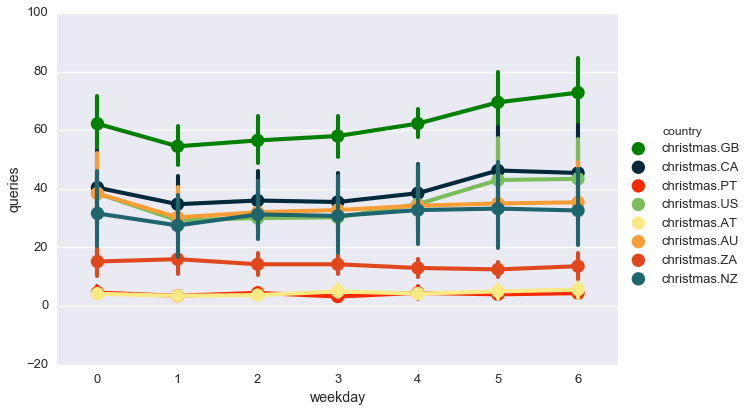

In [162]:
plt.figure(figsize=(15, 7))
pal={"christmas.GB": "g", "christmas.CA": "#00293c", "christmas.PT": "#f62a00", "christmas.US": "#114d41", "christmas.US": "#7bbd5d", "christmas.AT": "#fbe986" , "christmas.AU": "#f99d37", "christmas.ZA": "#e1471d", "christmas.NZ": "#1e656d"}
# sb.set_context("talk")
# ax.set_title('Countries and queries by weekday')
g=sb.factorplot(x="weekday", y="queries", hue="country", data=queries,palette=pal,kind='point', size=6, aspect=1.5)

### There is a clear increase of christmas related queries during the weekend

In [127]:
queries.country.unique()

array(['christmas.GB', 'christmas.CA', 'christmas.PT', 'christmas.US',
       'christmas.AT', 'christmas.AU', 'christmas.ZA', 'christmas.NZ'], dtype=object)

In [128]:
gb=queries.loc[queries['country'] == 'christmas.GB']
ca=queries.loc[queries['country'] == 'christmas.CA']
pt=queries.loc[queries['country'] == 'christmas.PT']
us=queries.loc[queries['country'] == 'christmas.US']
at=queries.loc[queries['country'] == 'christmas.AT']
au=queries.loc[queries['country'] == 'christmas.AU']
za=queries.loc[queries['country'] == 'christmas.ZA']
nz=queries.loc[queries['country'] == 'christmas.NZ']
gb.head()

,country,queries,weekday
start,,,
2015-11-01,christmas.GB,47,6
2015-11-02,christmas.GB,43,0
2015-11-03,christmas.GB,42,1
2015-11-04,christmas.GB,42,2
2015-11-05,christmas.GB,44,3


In [161]:
# fig, ax = plt.subplots(figsize=(10, 10))
# plt.figure(figsize=(10, 10))
# ax.set_ylabel('Count')
# sb.set_context("poster")
# ax.set_title('Countries')
# sb.pairplot(queries, hue="country")

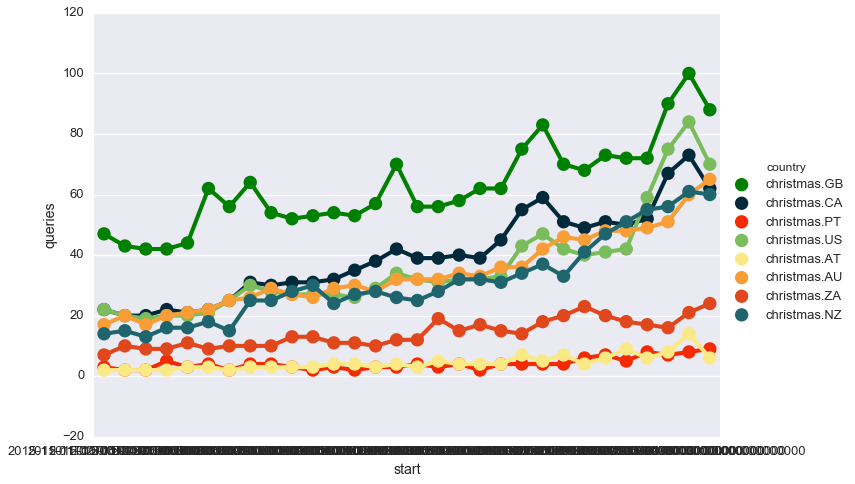

In [192]:
pal={"christmas.GB": "g", "christmas.CA": "#00293c", "christmas.PT": "#f62a00", "christmas.US": "#114d41", "christmas.US": "#7bbd5d", "christmas.AT": "#fbe986" , "christmas.AU": "#f99d37", "christmas.ZA": "#e1471d", "christmas.NZ": "#1e656d"}
sb.set_context("talk")
sb.set_palette("Paired")
ax.set_title('Countries and queries by day')
sb.factorplot(x="start", y="queries", hue="country", data=q2,palette=pal, kind='point', size=7, aspect=1.5)

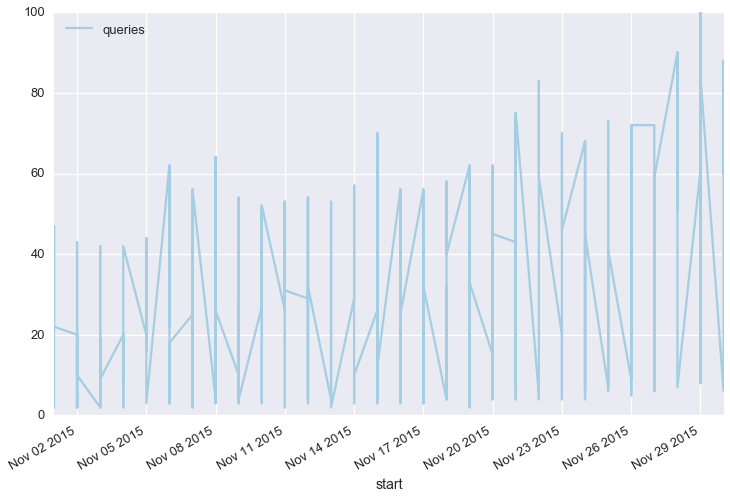

In [138]:
q=queries.drop(["weekday"],1)
q.plot(figsize=(12,8));

In [116]:
# gb['queries'].plot(figsize=(12,8));
gb.head()

,start,country,queries,weekday
Unnamed: 0,,,,
1,2015-11-01,christmas.GB,47,6
2,2015-11-02,christmas.GB,43,0
3,2015-11-03,christmas.GB,42,1
4,2015-11-04,christmas.GB,42,2
5,2015-11-05,christmas.GB,44,3


In [18]:
queries.groupby('country').agg("mean")

,queries
country,
christmas.AT,4.500000
christmas.AU,34.200000
christmas.CA,39.766667
christmas.GB,62.600000
christmas.NZ,31.433333
christmas.PT,4.133333
christmas.US,35.933333
christmas.ZA,14.133333


### Suggested date groups:
- Group 1: GB, US, CA, NZ, AU
- Group 2: ZA
- Group 3: AT, PT

# ARMAS
### GB

In [176]:
gb1=gb.drop(['country','weekday'], 1);

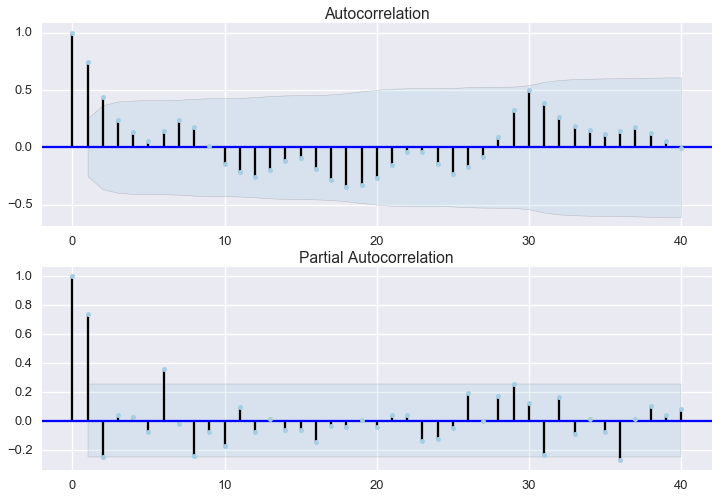

In [177]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sap.graphics.tsa.plot_acf(gb1.queries.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sap.graphics.tsa.plot_pacf(gb1.queries, lags=40, ax=ax2)

In [201]:
gb1.queries = gb1.queries.astype(float)

In [205]:
arma_mod20 = sap.tsa.ARMA(gb1, (2,0)).fit()
print(arma_mod20.params)

const            62.790621
ar.L1.queries     0.929449
ar.L2.queries    -0.207646
dtype: float64


In [204]:
statsmodels.__version__

'0.8.0rc1'

In [206]:
arma_mod30 = sap.tsa.ARMA(gb1, (3,0)).fit()

In [190]:
type(dta['SUNACTIVITY'][0])

numpy.float64

In [194]:
type(gb1['queries'][0])

numpy.int64